In [1]:
import pandas as pd 


In [21]:
df = pd.read_csv('data/LegoStatsMainV1.csv')
df2 = pd.read_csv('data/LegoStatsMainV2.csv')

In [22]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)
print(len(train_df), len(test_df))

223 56


Final R2 Score: 0.4813129308431938
Final MAE Score: 0.0898214979336796


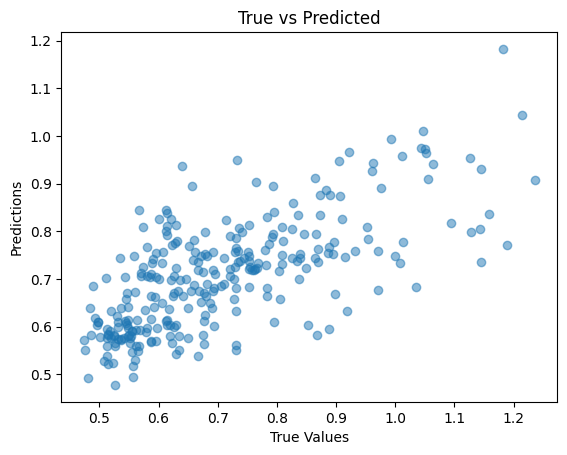

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)
train_df = df_encoded.drop(['set_name_x', 'ages', 'country'], axis=1)

X = train_df.drop(['return', 'pop_price', 'set_id', 'set_rating', 'retire_month'], axis=1)
y = train_df['return']

X = X.apply(pd.to_numeric, errors='coerce')
model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Final R2 Score:", r2_score(y, y_pred))
print("Final MAE Score:", mean_absolute_error(y, y_pred))

plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted")
plt.show()

